<a href="https://colab.research.google.com/github/TharachonWarin/Spotify_Project_203/blob/main/for_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection & Storage

In [ ]:
RND_SEED: int = 12345
np.random.seed(RND_SEED)
pd.core.common.random_state(RND_SEED)

RandomState(MT19937) at 0x7A81A3763440

แสดงข้อมูลเชิงสถิติของปี 2023 และ 2024

---



In [ ]:
!pip install skops
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import skops.io as sio
import scipy.stats as stats

from copy import deepcopy
from sklearn.preprocessing import PowerTransformer,QuantileTransformer


!git clone https://github.com/TharachonWarin/Spotify_Project_203/
sp23 = pd.read_csv('./Spotify_Project_203/Combined-2023.csv')
sp24 = pd.read_csv('./Spotify_Project_203/Combined-2024.csv')


fatal: destination path 'Spotify_Project_203' already exists and is not an empty directory.


In [ ]:
# information of dataset in 2023
sp23.info()
sp23.describe()
sp23.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            953 non-null    int64 
 1   track_name            953 non-null    object
 2   artist(s)_name        953 non-null    object
 3   artist_count          953 non-null    int64 
 4   released_year         953 non-null    int64 
 5   released_month        953 non-null    int64 
 6   released_day          953 non-null    int64 
 7   in_spotify_playlists  953 non-null    int64 
 8   in_spotify_charts     953 non-null    int64 
 9   streams               953 non-null    object
 10  in_apple_playlists    953 non-null    int64 
 11  in_apple_charts       953 non-null    int64 
 12  in_deezer_playlists   953 non-null    object
 13  in_deezer_charts      953 non-null    int64 
 14  in_shazam_charts      903 non-null    object
 15  bpm                   953 non-null    in

,Unnamed: 0,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,...,125,B,Major,80,89,83,31,0,8,4
1,1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,...,92,C#,Major,71,61,74,7,0,10,4
2,2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,...,138,F,Major,51,32,53,17,0,31,6
3,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,...,170,A,Major,55,58,72,11,0,11,15
4,4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# information of dataset in 2024
sp24.info()
sp24.describe()
sp24.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4600 non-null   int64  
 1   Track                       4600 non-null   object 
 2   Album Name                  4600 non-null   object 
 3   Artist                      4599 non-null   object 
 4   Release Date                4600 non-null   object 
 5   ISRC                        4597 non-null   object 
 6   All Time Rank               4600 non-null   object 
 7   Track Score                 4600 non-null   float64
 8   Spotify Streams             4487 non-null   object 
 9   Spotify Playlist Count      4530 non-null   object 
 10  Spotify Playlist Reach      4528 non-null   object 
 11  Spotify Popularity          3796 non-null   float64
 12  YouTube Views               4292 non-null   object 
 13  YouTube Likes               4285 

,Unnamed: 0,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Track Score'].plot(kind='hist', bins=20, title='Track Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Spotify Popularity'].plot(kind='hist', bins=20, title='Spotify Popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Apple Music Playlist Count'].plot(kind='hist', bins=20, title='Apple Music Playlist Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Track').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Album Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Artist').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Release Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Unnamed: 0', y='Track Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Track Score', y='Spotify Popularity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Spotify Popularity', y='Apple Music Playlist Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Apple Music Playlist Count', y='Deezer Playlist Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Track Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Track')):
  _plot_series(series, series_name, i)
  fig.legend(title='Track', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Track Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Track Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Album Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Album Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Track Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Track Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Artist')):
  _plot_series(series, series_name, i)
  fig.legend(title='Artist', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Track Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Track Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Release Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Release Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Track Score')

from matplotlib import pyplot as plt
_df_16['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Track Score'].plot(kind='line', figsize=(8, 4), title='Track Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Spotify Popularity'].plot(kind='line', figsize=(8, 4), title='Spotify Popularity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Apple Music Playlist Count'].plot(kind='line', figsize=(8, 4), title='Apple Music Playlist Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Album Name'].value_counts()
    for x_label, grp in _df_20.groupby('Track')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Track')
_ = plt.ylabel('Album Name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Artist'].value_counts()
    for x_label, grp in _df_21.groupby('Album Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Album Name')
_ = plt.ylabel('Artist')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Release Date'].value_counts()
    for x_label, grp in _df_22.groupby('Artist')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Artist')
_ = plt.ylabel('Release Date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ISRC'].value_counts()
    for x_label, grp in _df_23.groupby('Release Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Release Date')
_ = plt.ylabel('ISRC')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Track'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Unnamed: 0', y='Track', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Album Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Unnamed: 0', y='Album Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Artist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Unnamed: 0', y='Artist', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Release Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Unnamed: 0', y='Release Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)



แสดงการกระจายตัวโดยใช้ box plot


---




# **Box Plot**
Outlier datas and create box plots



### Feature - Streams


### Feature - BPM

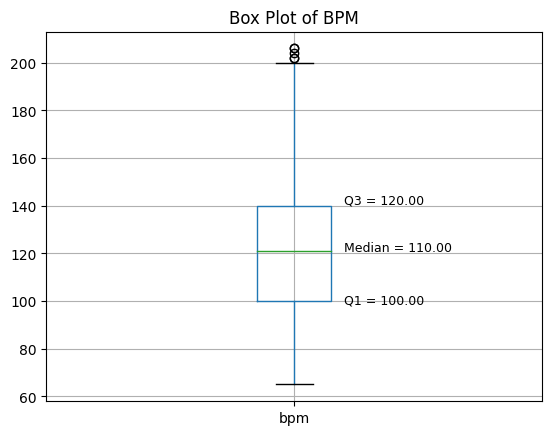

In [ ]:
Q1 = sp23['bpm'].quantile(0.25)
Q2 = sp23['bpm'].quantile(0.50)
Q3 = sp23['bpm'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bpmBox = {
    'bound':[lower_bound, upper_bound],
    'boxes':[Q1,Q3],
    'medians':[Q2],
    'fliers':[]
}

ax = sp23.boxplot(column=['bpm'])
ax.set_title('Box Plot of BPM')

plt.text(1.1, Q1-1, 'Q1 = 100.00', fontsize=9)
plt.text(1.1, Q3+1, 'Q3 = 120.00', fontsize=9)
plt.text(1.1, Q2, 'Median = 110.00', fontsize=9)
plt.show()

In [ ]:
#filter bpm outliner
filtered_bpm = sp23[(sp23['bpm'] >= lower_bound) & (sp23['bpm'] <= upper_bound)]['bpm']

### Feature - Danceability

Aommy-edit

In [ ]:
Q1 = sp23['danceability_%'].quantile(0.25)
Q2 = sp23['danceability_%'].quantile(0.50)
Q3 = sp23['danceability_%'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# dance = sp23[(sp23['danceability_%'] >= lower_bound) & (sp23['danceability_%'] <= upper_bound)]

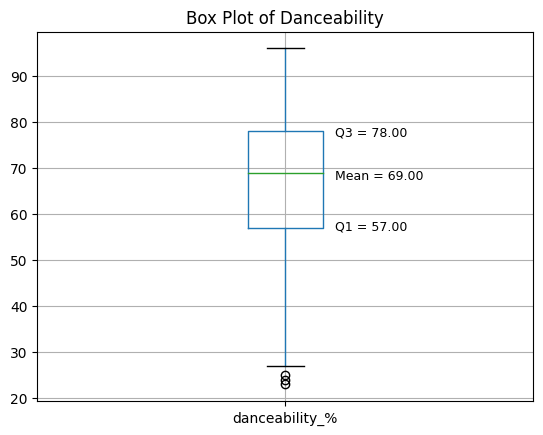

In [ ]:
ax = sp23.boxplot(column=['danceability_%'])
ax.set_title('Box Plot of Danceability')

plt.text(1.1, Q1-0.5, 'Q1 = 57.00',
         fontsize=9)
plt.text(1.1, Q2-1.5, 'Mean = 69.00',
         fontsize=9)
plt.text(1.1, Q3-1, 'Q3 = 78.00',
         fontsize=9)


plt.show()


### Feature - Valence

Aommy

In [ ]:
Q1 = sp23['valence_%'].quantile(0.25)
Q2 = sp23['valence_%'].quantile(0.50)
Q3 = sp23['valence_%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
Q3

70.0

Text(1.1, 69.0, 'Q3 = 70.00')

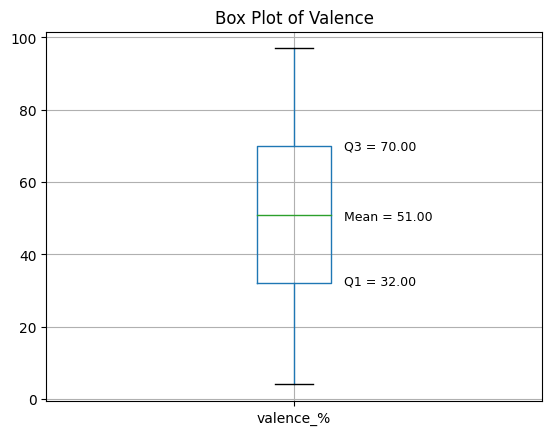

In [ ]:
ax = sp23.boxplot(column=['valence_%'])
ax.set_title('Box Plot of Valence')

plt.text(1.1, Q1-0.5, 'Q1 = 32.00',
         fontsize=9)
plt.text(1.1, Q2-1.5, 'Mean = 51.00',
         fontsize=9)
plt.text(1.1, Q3-1, 'Q3 = 70.00',
         fontsize=9)


### Feature - Energy

In [ ]:
Q1 = sp23['energy_%'].quantile(0.25)
Q2 = sp23['energy_%'].quantile(0.50)
Q3 = sp23['energy_%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
Q3

77.0

Text(1.1, 76.0, 'Q3 = 77.00')

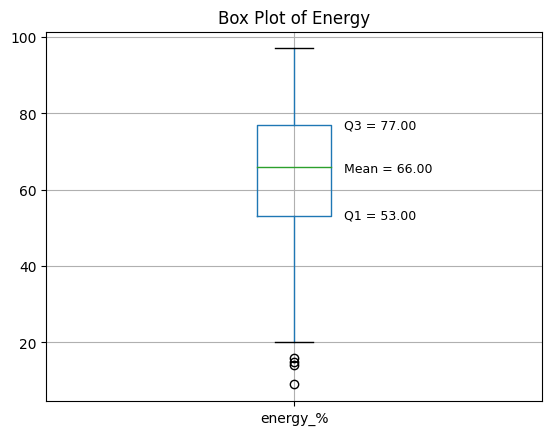

In [ ]:
ax = sp23.boxplot(column=['energy_%'])
ax.set_title('Box Plot of Energy')

plt.text(1.1, Q1-0.5, 'Q1 = 53.00',
         fontsize=9)
plt.text(1.1, Q2-1.5, 'Mean = 66.00',
         fontsize=9)
plt.text(1.1, Q3-1, 'Q3 = 77.00',
         fontsize=9)


### Feature - Acousticness

In [ ]:
Q1 = sp23['acousticness_%'].quantile(0.25)
Q2 = sp23['acousticness_%'].quantile(0.50)
Q3 = sp23['acousticness_%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Text(1.1, 42.0, 'Q3 = 43.00')

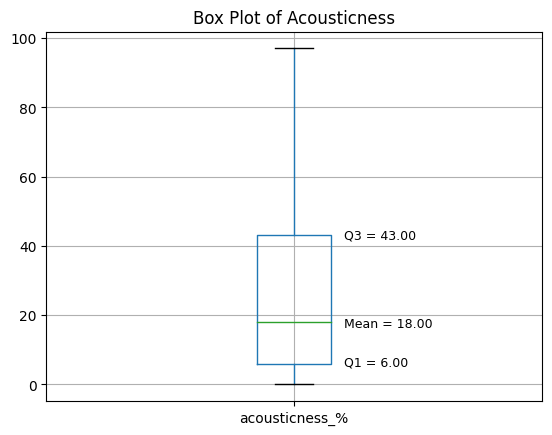

In [ ]:
ax = sp23.boxplot(column=['acousticness_%'])
ax.set_title('Box Plot of Acousticness')

plt.text(1.1, Q1-0.5, 'Q1 = 6.00',
         fontsize=9)
plt.text(1.1, Q2-1.5, 'Mean = 18.00',
         fontsize=9)
plt.text(1.1, Q3-1, 'Q3 = 43.00',
         fontsize=9)

### Feature - Instrumentalness

Text(1.1, 6.0, 'mean = 6.00')

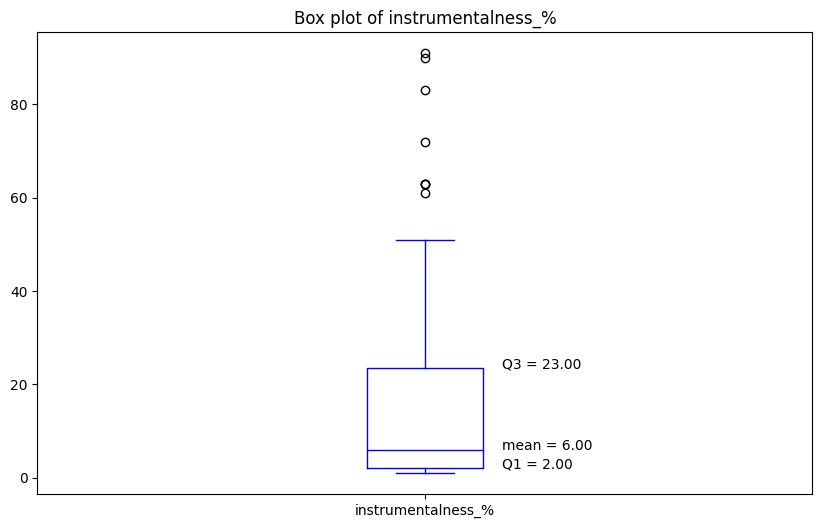

In [ ]:
speech = sp23[(sp23['instrumentalness_%'] > 0)]
Q1 = speech['instrumentalness_%'].quantile(0.25)
Q3 = speech['instrumentalness_%'].quantile(0.75)
Q2 = speech['instrumentalness_%'].quantile(0.50)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# plt.ylim(0,30)

# boxplot

speech['instrumentalness_%'].plot(kind='box',figsize=(10,6), color="blue")
# sp23['instrumentalness_%'].plot(kind='box',figsize=(10,6), color="blue")
plt.title('Box plot of instrumentalness_%')

# add text
plt.text(1.1,Q1, "Q1 = 2.00",fontsize=10)
plt.text(1.1,Q3, "Q3 = 23.00",fontsize=10)
plt.text(1.1,Q2, "mean = 6.00", fontsize=10)

### Feature - Liveness

In [ ]:
Q1 = sp23['liveness_%'].quantile(0.25)
Q2 = sp23['liveness_%'].quantile(0.50)
Q3 = sp23['liveness_%'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


Text(1.1, 23.0, 'Q3 = 24.00')

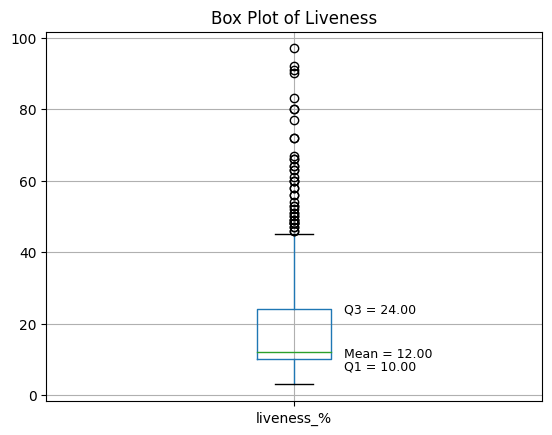

In [ ]:
ax = sp23.boxplot(column=['liveness_%'])
ax.set_title('Box Plot of Liveness')

plt.text(1.1, Q1-3, 'Q1 = 10.00',
         fontsize=9)
plt.text(1.1, Q2-1.5, 'Mean = 12.00',
         fontsize=9)
plt.text(1.1, Q3-1, 'Q3 = 24.00',
         fontsize=9)

### Feature - Spechiness

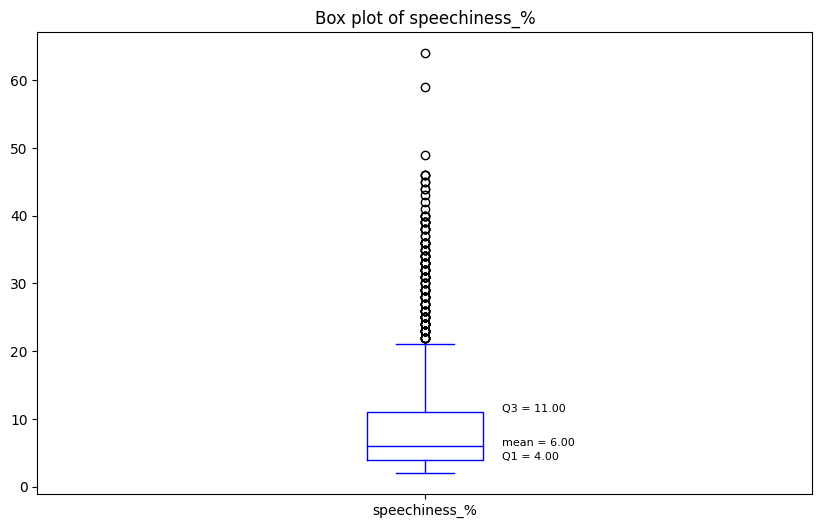

In [ ]:
sp23['speechiness_%'].describe()

Q1 = sp23['speechiness_%'].quantile(0.25)
Q3 = sp23['speechiness_%'].quantile(0.75)
Q2 = sp23['speechiness_%'].quantile(0.50)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# boxplot
speech = sp23[(sp23['speechiness_%'] >= lower_bound) & (sp23['speechiness_%'] <= upper_bound)]
# speech['speechiness_%'].plot(kind='box',figsize=(10,6), color="green")
sp23['speechiness_%'].plot(kind='box',figsize=(10,6), color="blue")
plt.title('Box plot of speechiness_%')

# add text
plt.text(1.1,Q1, "Q1 = 4.00",fontsize=8)
plt.text(1.1,Q3, "Q3 = 11.00",fontsize=8)
plt.text(1.1,Q2, "mean = 6.00", fontsize=8)

plt.show()
# sp23['speechiness_%'].describe()

### Feature - Artist Count

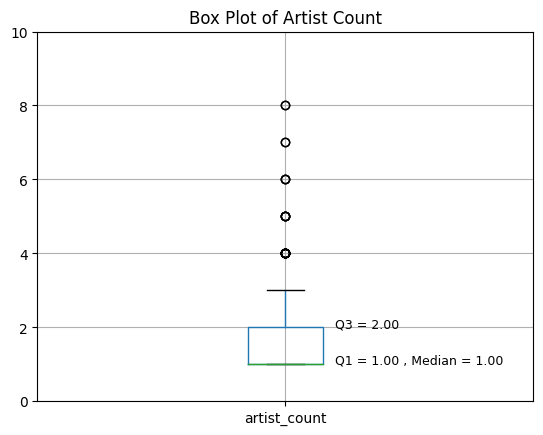

In [ ]:
Q1 = sp23['artist_count'].quantile(0.25)
Q2 = sp23['artist_count'].quantile(0.50)
Q3 = sp23['artist_count'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bpmBox = {
    'bound':[lower_bound, upper_bound],
    'boxes':[Q1,Q3],
    'medians':[Q2],
    'fliers':[]
}

ax = sp23.boxplot(column=['artist_count'])
ax.set_title('Box Plot of Artist Count')

plt.ylim(0,10)
plt.text(1.1, Q1, 'Q1 = 1.00 , Median = 1.00', fontsize=9)
plt.text(1.1, Q3, 'Q3 = 2.00', fontsize=9)
plt.show()



---


**Data Exploration & Visualization**: การเปรียบเทียบเชิงสถิติแบบเบื้องต้น เช่น
ค่าเฉลี่ย ค่ามัธยฐาน การกระจายตัว (variance) หรือการสร้างกราฟเพื่อดูความแตกต่างหรือความสัมพันธ์ระหว่างข้อมูล จะอยู่ในขั้นตอนนี้ เพราะเป็นการสำรวจข้อมูลเบื้องต้นเพื่อทำความเข้าใจรูปแบบและแนวโน้มของข้อมูล

**Data Experimentation & Prediction**: หากเป็นการเปรียบเทียบเชิงสถิติที่ลึกซึ้งขึ้น เช่น การใช้ t-test, ANOVA, หรือการทดสอบสมมติฐานเพื่อพิสูจน์ว่ากลุ่มข้อมูลมีความแตกต่างกันอย่างมีนัยสำคัญ นั่นจะจัดอยู่ในขั้นตอนของ Data Experimentation เพราะเกี่ยวข้องกับการทดสอบและการทำสรุปเชิงสถิติที่มีผลต่อการตัดสินใจ

---



# Data Preparation

*   จัดการ Missing value - โค้ด Micky
*   จัดการ outliner
*   การเลือกกลุ่มข้อมูลเพื่อทำการวิเคราะห์เปรียบเทียบ และหา insight





In [ ]:
# Handling missing values for numeric columns by filling with mean
for col in sp23.select_dtypes(include='number').columns:
    sp23[col].fillna(sp23[col].mean(), inplace=True)

# Handling missing values for non-numeric columns by filling with the most frequent value
for col in sp23.select_dtypes(exclude='number').columns:
    sp23[col].fillna(sp23[col].mode()[0], inplace=True)

In [ ]:
# Handling missing values for numeric columns by filling with mean
for col in sp24.select_dtypes(include='number').columns:
    sp24[col].fillna(sp24[col].mean(), inplace=True)

# Handling missing values for non-numeric columns by filling with the most frequent value
for col in sp24.select_dtypes(exclude='number').columns:
    sp24[col].fillna(sp24[col].mode()[0], inplace=True)

In [ ]:
# Detecting and managing outlier values
from scipy.stats import zscore

# Ensure to include only numeric columns in the zscore function
z_scores = zscore(sp23.select_dtypes(include='number'))
outliers = (z_scores > 3) | (z_scores < -3)
# Managing outliers (Example: Removing outlier data points)
sp23 = sp23[~outliers.any(axis=1)]

In [ ]:
# Detecting and managing outlier values
from scipy.stats import zscore

# Ensure to include only numeric columns in the zscore function
z_scores = zscore(sp24.select_dtypes(include='number'))
outliers = (z_scores > 3) | (z_scores < -3)
# Managing outliers (Example: Removing outlier data points)
sp24 = sp24[~outliers.any(axis=1)]

เลือกข้อมูลที่จะนำมาวิเคราะห์

---



In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sp23.drop(['streams', 'in_spotify_charts'], axis=1),
                                                    sp23[['streams', 'in_spotify_charts']],
                                                    test_size=0.1,
                                                    random_state=RND_SEED)

# Data Exploration & Visualization

*  แสดงข้อมูลในรูปเชิงกราฟ






# Histogram

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with updated titles
fig = make_subplots(rows=7, cols=2,
                    subplot_titles=(
                        'in_spotify_playlists Distribution',
                        'in_apple_playlists Distribution',
                        'in_deezer_playlists Distribution',
                        'bpm Distribution',
                        'key Distribution',
                        'mode Distribution',
                        'danceability_% Distribution',
                        'valence_% Distribution',
                        'energy_% Distribution',
                        'acousticness_% Distribution',
                        'instrumentalness_% Distribution',
                        'liveness_% Distribution',
                        'speechiness_% Distribution'
                    ))

# Add histograms for each remaining column
fig.add_trace(go.Histogram(x=sp23['in_spotify_playlists'], name='in_spotify_playlists', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=sp23['in_apple_playlists'], name='in_apple_playlists', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=sp23['in_deezer_playlists'], name='in_deezer_playlists', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=2, col=1)
fig.add_trace(go.Histogram(x=sp23['bpm'], name='bpm', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=2, col=2)
fig.add_trace(go.Histogram(x=sp23['key'], name='key', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=3, col=1)
fig.add_trace(go.Histogram(x=sp23['mode'], name='mode', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=3, col=2)
fig.add_trace(go.Histogram(x=sp23['danceability_%'], name='danceability', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=4, col=1)
fig.add_trace(go.Histogram(x=sp23['valence_%'], name='valence', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=4, col=2)
fig.add_trace(go.Histogram(x=sp23['energy_%'], name='energy', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=5, col=1)
fig.add_trace(go.Histogram(x=sp23['acousticness_%'], name='acousticness', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=5, col=2)
fig.add_trace(go.Histogram(x=sp23['instrumentalness_%'], name='instrumentalness', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=6, col=1)
fig.add_trace(go.Histogram(x=sp23['liveness_%'], name='liveness', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=6, col=2)
fig.add_trace(go.Histogram(x=sp23['speechiness_%'], name='speechiness', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=7, col=1)

# Update layout
fig.update_layout(title_text='Distribution of 2023 Data', height=2000, width=1200)

# Show the plot
fig.show()


ช่วยแก้ shazam กับ stream ให้หน่อย ไม่หวายละ!!

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with updated titles including "Distribution"
fig = make_subplots(rows=6, cols=2,
                    subplot_titles=(
                        'Spotify Playlist Count Distribution',
                        'Apple Music Playlist Count Distribution',
                        'Amazon Playlist Count Distribution',
                        'Shazam Counts Distribution',
                        'Explicit Track Distribution'
                    ))

# Add histograms for each feature with borders
fig.add_trace(go.Histogram(x=sp24['Spotify Playlist Count'], name='Spotify Playlist Count',
                             marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=sp24['Apple Music Playlist Count'], name='Apple Music Playlist Count', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=sp24['Amazon Playlist Count'], name='Amazon Playlist Count', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=2, col=1)
fig.add_trace(go.Histogram(x=sp24['Shazam Counts'], name='Shazam Counts', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=2, col=2)
fig.add_trace(go.Histogram(x=sp24['Explicit Track'], name='Explicit Track', opacity=0.75,
                             marker=dict(line=dict(color='black', width=1))), row=3, col=1)

# Update layout
fig.update_layout(title_text='Distribution of 2024 Data', height=1500, width=1200)

# Show the plot
fig.show()


## Energy

NameError: name 'cal' is not defined

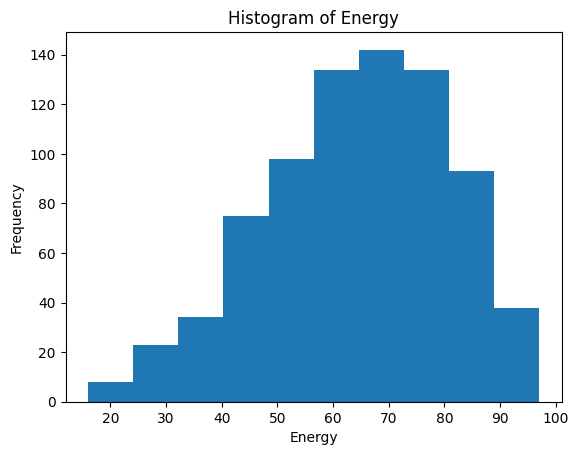

In [ ]:
# cal =sp23[(sp23['energy_%'] > 53) & (sp23['energy_%'] < 77)] #cut outline
plt.hist(sp23['energy_%'])
# plt.hist(cal['energy_%'],color='MediumAquamarine',edgecolor='black')
plt.title('Histogram of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')

plt.axvline(cal['energy_%'].mean(), color='red', linestyle='--',label='Mean')
plt.legend()
# plt.axvline(x=77, color='red', linestyle='--')
plt.show()

In [ ]:
scaler = QuantileTransformer(output_distribution='normal', random_state=12345)

# Prepare data for SKLearn's scaler and transform into df again
arr = sp23['energy_%'].to_numpy()[:, np.newaxis]
sp23['energy_%'].astype(np.float64, copy=False)
scaler.fit(arr)
sp23['energy_%'] = sp23['energy_%'].astype(np.float64)
sp23['energy_%'][:] = scaler.transform(arr)[:, 0]


# Plot Histogram after scaling
plt.hist(sp23['energy_%'])
plt.show()

In [ ]:
arr = sp23['energy_%'].to_numpy()
res = stats.kstest(arr, "norm", alternative="two-sided")
print(res.pvalue)

# Data Experimentation & Prediction

*   นำเสนอ insight information
*   statistic model





# ความสัมพันธ์ของ feature เพลง ระหว่าง 100 อันดับแรก และ 500 อันดับแรก ของปี 2023

bpm valence acoustic dance energy

key=เมา

In [ ]:
# @title
import plotly.graph_objects as go

# สมมุติว่า sp23 เป็น DataFrame ที่มีข้อมูลทั้งหมด
# กรองข้อมูลเพลงที่มีอันดับ
top_50 = sp23[sp23['in_spotify_charts'] <= 50]
between_50_and_100 = sp23[(sp23['in_spotify_charts'] > 50) & (sp23['in_spotify_charts'] <= 100)]
out_top_100 = sp23[sp23['in_spotify_charts'] > 100]

# สร้างช่วง (bins) สำหรับ bpm
bpm_bins = pd.cut(sp23['bpm'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_bpm_counts = top_50['bpm'].groupby(bpm_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_bpm_counts = between_50_and_100['bpm'].groupby(bpm_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_bpm_counts = out_top_100['bpm'].groupby(bpm_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_bpm_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_bpm_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_bpm_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_bpm = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_bpm.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_bpm_counts.index.categories],  # Convert Interval to string
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_bpm.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_bpm_counts.index.categories],  # Convert Interval to string
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_bpm.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_bpm_counts.index.categories],  # Convert Interval to string
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_bpm.update_layout(
    title='Distribution of BPM for Top 50 vs 50-100 vs Out of 100 (Percentage)',
    xaxis_title='BPM (Bins)',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_bpm.show()


<ipython-input-90-03a975e2cf7e>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-90-03a975e2cf7e>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-90-03a975e2cf7e>:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# @title
import plotly.graph_objects as go

# สมมุติว่า sp23 เป็น DataFrame ที่มีข้อมูลทั้งหมด
# กรองข้อมูลเพลงที่มีอันดับ
top_50 = sp23[sp23['in_spotify_charts'] <= 50]
between_50_and_100 = sp23[(sp23['in_spotify_charts'] > 50) & (sp23['in_spotify_charts'] <= 100)]
out_top_100 = sp23[sp23['in_spotify_charts'] > 100]

# นับจำนวนเพลงในแต่ละ key สำหรับ Top 50
top_50_key_counts = top_50['key'].value_counts()

# นับจำนวนเพลงในแต่ละ key สำหรับ 50-100
between_50_and_100_key_counts = between_50_and_100['key'].value_counts()

# นับจำนวนเพลงในแต่ละ key สำหรับ Out of 100
outof_top100_key_counts = out_top_100['key'].value_counts()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_key_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_key_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_key_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_key = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_key.add_trace(go.Scatter(
    x=top_50_percentage.index,  # ใช้ key เป็นแกน x
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_key.add_trace(go.Scatter(
    x=between_50_and_100_percentage.index,  # ใช้ key เป็นแกน x
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_key.add_trace(go.Scatter(
    x=outof_top100_percentage.index,  # ใช้ key เป็นแกน x
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_key.update_layout(
    title='Distribution of Key for Top 50 vs 50-100 vs Out of 100 (Percentage)',
    xaxis_title='Key',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_key.show()


In [ ]:
# @title
import plotly.graph_objects as go

# สมมุติว่า sp23 เป็น DataFrame ที่มีข้อมูลทั้งหมด
# กรองข้อมูลเพลงที่มีอันดับ
top_50 = sp23[sp23['in_spotify_charts'] <= 50]
between_50_and_100 = sp23[(sp23['in_spotify_charts'] > 50) & (sp23['in_spotify_charts'] <= 100)]
out_top_100 = sp23[sp23['in_spotify_charts'] > 100]

# สร้างช่วง (bins) สำหรับ danceability_%
danceability_bins = pd.cut(sp23['danceability_%'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_danceability_counts = top_50['danceability_%'].groupby(danceability_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_danceability_counts = between_50_and_100['danceability_%'].groupby(danceability_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_danceability_counts = out_top_100['danceability_%'].groupby(danceability_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_danceability_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_danceability_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_danceability_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_danceability = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_danceability.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_danceability_counts.index.categories],  # Convert Interval to string
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_danceability.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_danceability_counts.index.categories],  # Convert Interval to string
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_danceability.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_danceability_counts.index.categories],  # Convert Interval to string
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_danceability.update_layout(
    title='Distribution of Danceability (%) for Top 50 vs 50-100 vs Out of 100 (Percentage)',
    xaxis_title='Danceability (%) Bins',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_danceability.show()


<ipython-input-92-0ea6c9805312>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-92-0ea6c9805312>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-92-0ea6c9805312>:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# @title
import plotly.graph_objects as go

# สมมุติว่า sp23 เป็น DataFrame ที่มีข้อมูลทั้งหมด
# กรองข้อมูลเพลงที่มีอันดับ
top_50 = sp23[sp23['in_spotify_charts'] <= 50]
between_50_and_100 = sp23[(sp23['in_spotify_charts'] > 50) & (sp23['in_spotify_charts'] <= 100)]
out_top_100 = sp23[sp23['in_spotify_charts'] > 100]

# สร้างช่วง (bins) สำหรับ valence_%
valence_bins = pd.cut(sp23['valence_%'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_valence_counts = top_50['valence_%'].groupby(valence_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_valence_counts = between_50_and_100['valence_%'].groupby(valence_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_valence_counts = out_top_100['valence_%'].groupby(valence_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_valence_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_valence_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_valence_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_valence = go.Figure()

# เพิ่มกราฟ Top 50
fig_valence.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_valence_counts.index.categories],  # Convert Interval to string
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟ 50-100
fig_valence.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_valence_counts.index.categories],  # Convert Interval to string
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟ Out of 100
fig_valence.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_valence_counts.index.categories],  # Convert Interval to string
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# layout
fig_valence.update_layout(
    title='Distribution of Valence (%) for Top 50 vs 50-100 vs Out of 100 (Percentage)',
    xaxis_title='Valence (%) Bins',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_valence.show()


<ipython-input-93-fbeebb19b5b4>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-93-fbeebb19b5b4>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-93-fbeebb19b5b4>:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# @title
import plotly.graph_objects as go

# สร้างช่วง (bins) สำหรับ acousticness_%
acousticness_bins = pd.cut(sp23['acousticness_%'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_acousticness_counts = top_50['acousticness_%'].groupby(acousticness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_acousticness_counts = between_50_and_100['acousticness_%'].groupby(acousticness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_acousticness_counts = out_top_100['acousticness_%'].groupby(acousticness_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_acousticness_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_acousticness_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_acousticness_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_acousticness = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_acousticness.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_acousticness_counts.index.categories],
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_acousticness.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_acousticness_counts.index.categories],
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_acousticness.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_acousticness_counts.index.categories],
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_acousticness.update_layout(
    title='Distribution of Acousticness (%) for Top 50 vs 50-100 vs Out of 100',
    xaxis_title='Acousticness (%) Bins',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_acousticness.show()


<ipython-input-94-eb4b42400a33>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-94-eb4b42400a33>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-94-eb4b42400a33>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# @title
import plotly.graph_objects as go

# สมมุติว่า sp23 เป็น DataFrame ที่มีข้อมูลทั้งหมด
# กรองข้อมูลเพลงที่มีอันดับ
top_50 = sp23[sp23['in_spotify_charts'] <= 50]
between_50_and_100 = sp23[(sp23['in_spotify_charts'] > 50) & (sp23['in_spotify_charts'] <= 100)]
out_top_100 = sp23[sp23['in_spotify_charts'] > 100]

# สร้างช่วง (bins) สำหรับ energy_%
energy_bins = pd.cut(sp23['energy_%'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_energy_counts = top_50['energy_%'].groupby(energy_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_energy_counts = between_50_and_100['energy_%'].groupby(energy_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_energy_counts = out_top_100['energy_%'].groupby(energy_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_energy_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_energy_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_energy_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_energy = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_energy.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_energy_counts.index.categories],  # Convert Interval to string
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_energy.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_energy_counts.index.categories],  # Convert Interval to string
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_energy.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_energy_counts.index.categories],  # Convert Interval to string
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_energy.update_layout(
    title='Distribution of Energy (%) for Top 50 vs 50-100 vs Out of 100 (Percentage)',
    xaxis_title='Energy (%) Bins',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_energy.show()


<ipython-input-95-87b9797309ce>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-95-87b9797309ce>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-95-87b9797309ce>:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# @title
# สร้างช่วง (bins) สำหรับ instrumentalness_%
instrumentalness_bins = pd.cut(sp23['instrumentalness_%'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_instrumentalness_counts = top_50['instrumentalness_%'].groupby(instrumentalness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_instrumentalness_counts = between_50_and_100['instrumentalness_%'].groupby(instrumentalness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_instrumentalness_counts = out_top_100['instrumentalness_%'].groupby(instrumentalness_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_instrumentalness_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_instrumentalness_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_instrumentalness_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_instrumentalness = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_instrumentalness.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_instrumentalness_counts.index.categories],
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_instrumentalness.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_instrumentalness_counts.index.categories],
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_instrumentalness.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_instrumentalness_counts.index.categories],
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_instrumentalness.update_layout(
    title='Distribution of Instrumentalness (%) for Top 50 vs 50-100 vs Out of 100',
    xaxis_title='Instrumentalness (%) Bins',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_instrumentalness.show()


<ipython-input-96-0b9c1016f68b>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-96-0b9c1016f68b>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-96-0b9c1016f68b>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# @title
# สร้างช่วง (bins) สำหรับ liveness_%
liveness_bins = pd.cut(sp23['liveness_%'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_liveness_counts = top_50['liveness_%'].groupby(liveness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_liveness_counts = between_50_and_100['liveness_%'].groupby(liveness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_liveness_counts = out_top_100['liveness_%'].groupby(liveness_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_liveness_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_liveness_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_liveness_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_liveness = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_liveness.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_liveness_counts.index.categories],
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_liveness.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_liveness_counts.index.categories],
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_liveness.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_liveness_counts.index.categories],
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_liveness.update_layout(
    title='Distribution of Liveness (%) for Top 50 vs 50-100 vs Out of 100',
    xaxis_title='Liveness (%) Bins',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_liveness.show()


<ipython-input-97-bb2e20a8695f>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-97-bb2e20a8695f>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-97-bb2e20a8695f>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# @title
# สร้างช่วง (bins) สำหรับ speechiness_%
speechiness_bins = pd.cut(sp23['speechiness_%'], bins=10)

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Top 50
top_50_speechiness_counts = top_50['speechiness_%'].groupby(speechiness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ 50-100
between_50_and_100_speechiness_counts = between_50_and_100['speechiness_%'].groupby(speechiness_bins).count()

# นับจำนวนเพลงในแต่ละช่วงสำหรับ Out of 100
outof_top100_speechiness_counts = out_top_100['speechiness_%'].groupby(speechiness_bins).count()

# คำนวณเปอร์เซ็นต์
top_50_percentage = (top_50_speechiness_counts / len(top_50)) * 100
between_50_and_100_percentage = (between_50_and_100_speechiness_counts / len(between_50_and_100)) * 100
outof_top100_percentage = (outof_top100_speechiness_counts / len(out_top_100)) * 100

# สร้างกราฟเส้น
fig_speechiness = go.Figure()

# เพิ่มกราฟสำหรับ Top 50
fig_speechiness.add_trace(go.Scatter(
    x=[str(interval) for interval in top_50_speechiness_counts.index.categories],
    y=top_50_percentage.values,
    mode='lines+markers',
    name='Top 50',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ 50-100
fig_speechiness.add_trace(go.Scatter(
    x=[str(interval) for interval in between_50_and_100_speechiness_counts.index.categories],
    y=between_50_and_100_percentage.values,
    mode='lines+markers',
    name='50-100',
    marker=dict(size=8),
    line=dict(width=2)
))

# เพิ่มกราฟสำหรับ Out of 100
fig_speechiness.add_trace(go.Scatter(
    x=[str(interval) for interval in outof_top100_speechiness_counts.index.categories],
    y=outof_top100_percentage.values,
    mode='lines+markers',
    name='Out of 100',
    marker=dict(size=8),
    line=dict(width=2)
))

# ปรับแต่ง layout
fig_speechiness.update_layout(
    title='Distribution of Speechiness (%) for Top 50 vs 50-100 vs Out of 100',
    xaxis_title='Speechiness (%) Bins',
    yaxis_title='Percentage of Songs',
    legend=dict(title='Rank'),
)

# แสดงกราฟ
fig_speechiness.show()


<ipython-input-98-a6bc2127d864>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-98-a6bc2127d864>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-98-a6bc2127d864>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# จำนวนช่วงของแต่ละ Feature ที่ติด top 50

In [ ]:
# @title
import plotly.graph_objects as go

# ฟังก์ชันสำหรับสร้างแผนภูมิแท่ง
def create_bar_chart(data, column, title):
    # สร้างช่วง (bins) สำหรับคอลัมน์ที่กำหนด
    bins = pd.cut(data[column], bins=10)

    # นับจำนวนเพลงในแต่ละช่วง
    counts = data[column].groupby(bins).count()

    # สร้างแผนภูมิแท่ง
    fig = go.Figure()

    # เพิ่มข้อมูลลงในแผนภูมิแท่ง
    fig.add_trace(go.Bar(
        x=[str(interval) for interval in counts.index.categories],  # ช่วงของคอลัมน์
        y=counts.values,  # จำนวนเพลงในแต่ละช่วง
        name=title,
        marker=dict(color='aquamarine', line=dict(color='black', width=1))
    ))

    # ปรับแต่ง layout
    fig.update_layout(
        title=title,
        xaxis_title=f'{column} (Bins)',
        yaxis_title='Number of Songs',
        legend=dict(title='Rank'),
    )

    # แสดงแผนภูมิ
    fig.show()

create_bar_chart(top_50, 'bpm', 'Number of Songs in Each BPM Range for Top 50')
create_bar_chart(top_50, 'danceability_%', 'Number of Songs in Each Danceability Range for Top 50')
create_bar_chart(top_50, 'valence_%', 'Number of Songs in Each Valence Range for Top 50')
create_bar_chart(top_50, 'energy_%', 'Number of Songs in Each Energy Range for Top 50')
create_bar_chart(top_50, 'acousticness_%', 'Number of Songs in Each Acousticness Range for Top 50')
create_bar_chart(top_50, 'instrumentalness_%', 'Number of Songs in Each Instrumentalness Range for Top 50')
create_bar_chart(top_50, 'liveness_%', 'Number of Songs in Each Liveness Range for Top 50')
create_bar_chart(top_50, 'speechiness_%', 'Number of Songs in Each Speechiness Range for Top 50')


<ipython-input-73-5f5ec01d85d6>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



หา correlation เผื่อได้

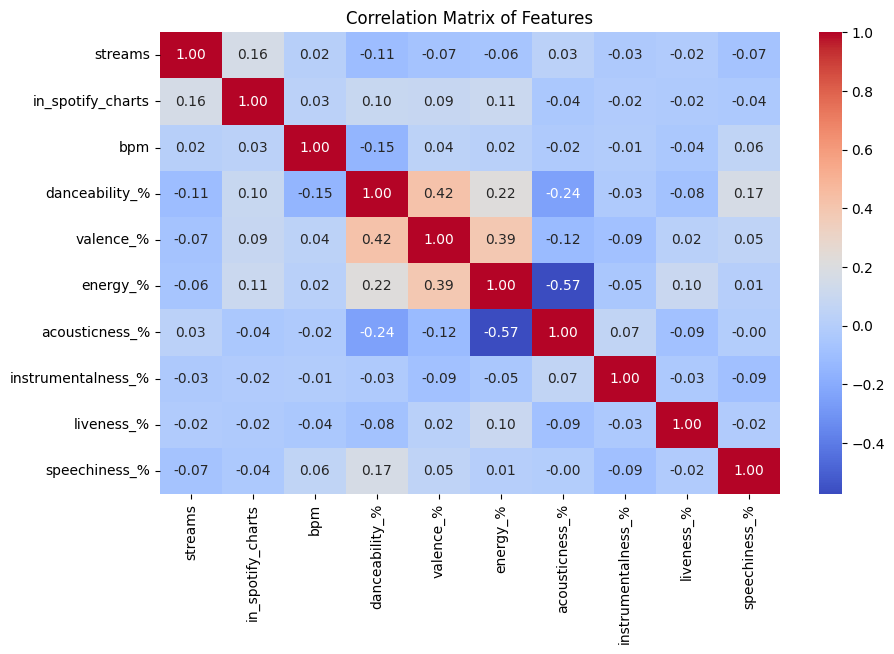

In [ ]:
correlation_matrix = top_50[['streams', 'in_spotify_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


อาจดูที่ valence energy speechiness เพราะ streams ช่างมัน

หาว่าแต่ละช่วงของ feature อยู่ mean อันดับในชาร์ทเป็นยังไง ยิ่งน้อยยิ่งดี

In [ ]:
import plotly.graph_objects as go

def plot_mean_in_spotify_charts(data, feature):
    mean_values = data.groupby(feature)['in_spotify_charts'].mean().reset_index()

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=mean_values[feature],
        y=mean_values['in_spotify_charts'],
        mode='markers+lines',
        name=f'Mean of in_spotify_charts by {feature}',
        marker=dict(size=8)
    ))

    fig.update_layout(
        title=f'Mean of in_spotify_charts by {feature}',
        xaxis_title=feature,
        yaxis_title='Mean of in_spotify_charts',
        legend=dict(title='Legend'),
    )

    fig.show()

plot_mean_in_spotify_charts(top_50, 'bpm')
plot_mean_in_spotify_charts(top_50, 'danceability_%')
plot_mean_in_spotify_charts(top_50, 'valence_%')
plot_mean_in_spotify_charts(top_50, 'energy_%')
plot_mean_in_spotify_charts(top_50, 'acousticness_%')
plot_mean_in_spotify_charts(top_50, 'instrumentalness_%')
plot_mean_in_spotify_charts(top_50, 'liveness_%')
plot_mean_in_spotify_charts(top_50, 'speechiness_%')


# ศิลปิน 10 อันดับ ที่ติด top 50 บ่อยที่สุด

In [ ]:
top_50 = sp23[sp23['in_spotify_charts'] <= 50]

top_artists_counts = top_50['artist(s)_name'].value_counts().head(10)

top_artists_df = top_artists_counts.reset_index()
top_artists_df.columns = ['artist(s)_name', 'count']

print(top_artists_df)


     artist(s)_name  count
0      Taylor Swift     30
1        The Weeknd     19
2         Bad Bunny     18
3               SZA     17
4      Harry Styles     15
5     Morgan Wallen     10
6    Kendrick Lamar     10
7               BTS      8
8              Feid      8
9  Drake, 21 Savage      7


In [ ]:
top_50 = sp23[sp23['in_spotify_charts'] <= 50]

top_artists_counts = top_50['artist(s)_name'].value_counts().head(10)

top_artists_df = top_artists_counts.reset_index()
top_artists_df.columns = ['artist(s)_name', 'count']

print("Top Artists in the Top 50 Tracks:")
print(top_artists_df)

top_artists_data = sp24[sp24['Artist'].isin(top_artists_df['artist(s)_name'])]

average_popularity = top_artists_data.groupby('Artist')['Spotify Popularity'].mean().reset_index()

total_streams = top_artists_data.groupby('Artist')['Spotify Streams'].sum().reset_index()

average_track_score = top_artists_data.groupby('Artist')['Track Score'].mean().reset_index()

combined_insights = pd.merge(average_popularity, total_streams, left_on='Artist', right_on='Artist', suffixes=('_avg_popularity', '_total_streams'))
combined_insights = pd.merge(combined_insights, average_track_score, left_on='Artist', right_on='Artist')

combined_insights.rename(columns={'Track Score': 'Average Track Score'}, inplace=True)

print("Combined Insights of Top Artists:")
print(combined_insights)


Top Artists in the Top 50 Tracks:
     artist(s)_name  count
0      Taylor Swift     30
1        The Weeknd     19
2         Bad Bunny     18
3               SZA     17
4      Harry Styles     15
5     Morgan Wallen     10
6    Kendrick Lamar     10
7               BTS      8
8              Feid      8
9  Drake, 21 Savage      7
Combined Insights of Top Artists:
           Artist  Spotify Popularity  \
0             BTS           64.461538   
1       Bad Bunny           69.070564   
2            Feid           71.323622   
3    Harry Styles           71.550158   
4  Kendrick Lamar           71.366772   
5   Morgan Wallen           72.025079   
6             SZA           73.192429   
7    Taylor Swift           69.873498   
8      The Weeknd           66.640126   

                                     Spotify Streams  Average Track Score  
0  1,257,974,1351,165,842,896675,763,141717,715,4...            38.223077  
1  478,150,858689,181,4551,421,763,497717,849,037...            42.00000

Platform ใด

Correlation Matrix:
                        Spotify Popularity  All Time Rank  \
Spotify Popularity                1.000000      -0.133445   
All Time Rank                    -0.133445       1.000000   
Spotify Playlist Count           -0.096350      -0.024366   
Spotify Playlist Reach            0.030655       0.048052   

                        Spotify Playlist Count  Spotify Playlist Reach  
Spotify Popularity                   -0.096350                0.030655  
All Time Rank                        -0.024366                0.048052  
Spotify Playlist Count                1.000000                0.581453  
Spotify Playlist Reach                0.581453                1.000000  


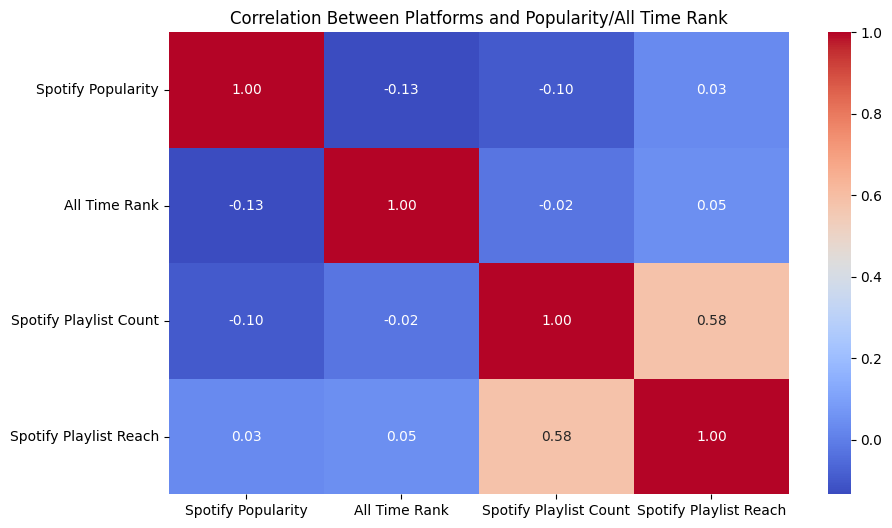

In [ ]:
sp24['Spotify Popularity'] = pd.to_numeric(sp24['Spotify Popularity'], errors='coerce')
sp24['All Time Rank'] = pd.to_numeric(sp24['All Time Rank'], errors='coerce')
sp24['Spotify Playlist Count'] = pd.to_numeric(sp24['Spotify Playlist Count'], errors='coerce')
sp24['Spotify Playlist Reach'] = pd.to_numeric(sp24['Spotify Playlist Reach'], errors='coerce')

metrics_df = sp24[['Spotify Popularity', 'All Time Rank', 'Spotify Playlist Count', 'Spotify Playlist Reach']]

correlation_matrix = metrics_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Platforms and Popularity/All Time Rank')
plt.show()


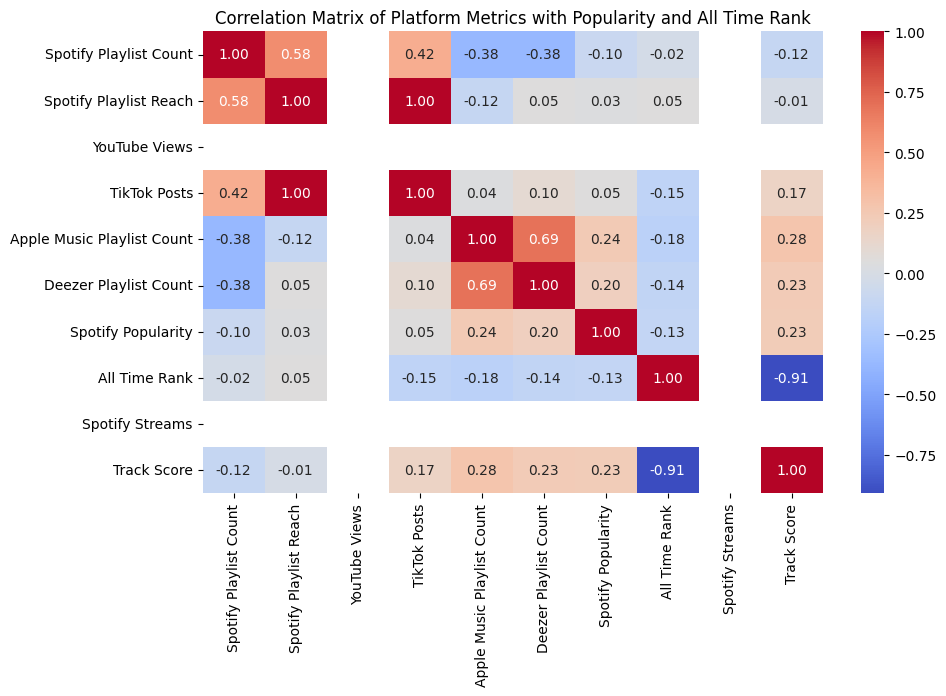

In [ ]:
platform_columns = [
    'Spotify Playlist Count',
    'Spotify Playlist Reach',
    'YouTube Views',
    'TikTok Posts',
    'Apple Music Playlist Count',
    'Deezer Playlist Count',
    'Spotify Popularity',
    'All Time Rank',
    'Spotify Streams',
    'Track Score'
]

for column in platform_columns:
    sp24[column] = pd.to_numeric(sp24[column], errors='coerce')

platform_metrics = sp24[platform_columns].agg(['mean', 'sum']).transpose()
platform_metrics = platform_metrics.reset_index()
platform_metrics.columns = ['Metric', 'Mean', 'Total']

correlation_matrix = sp24[platform_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Platform Metrics with Popularity and All Time Rank')
plt.show()


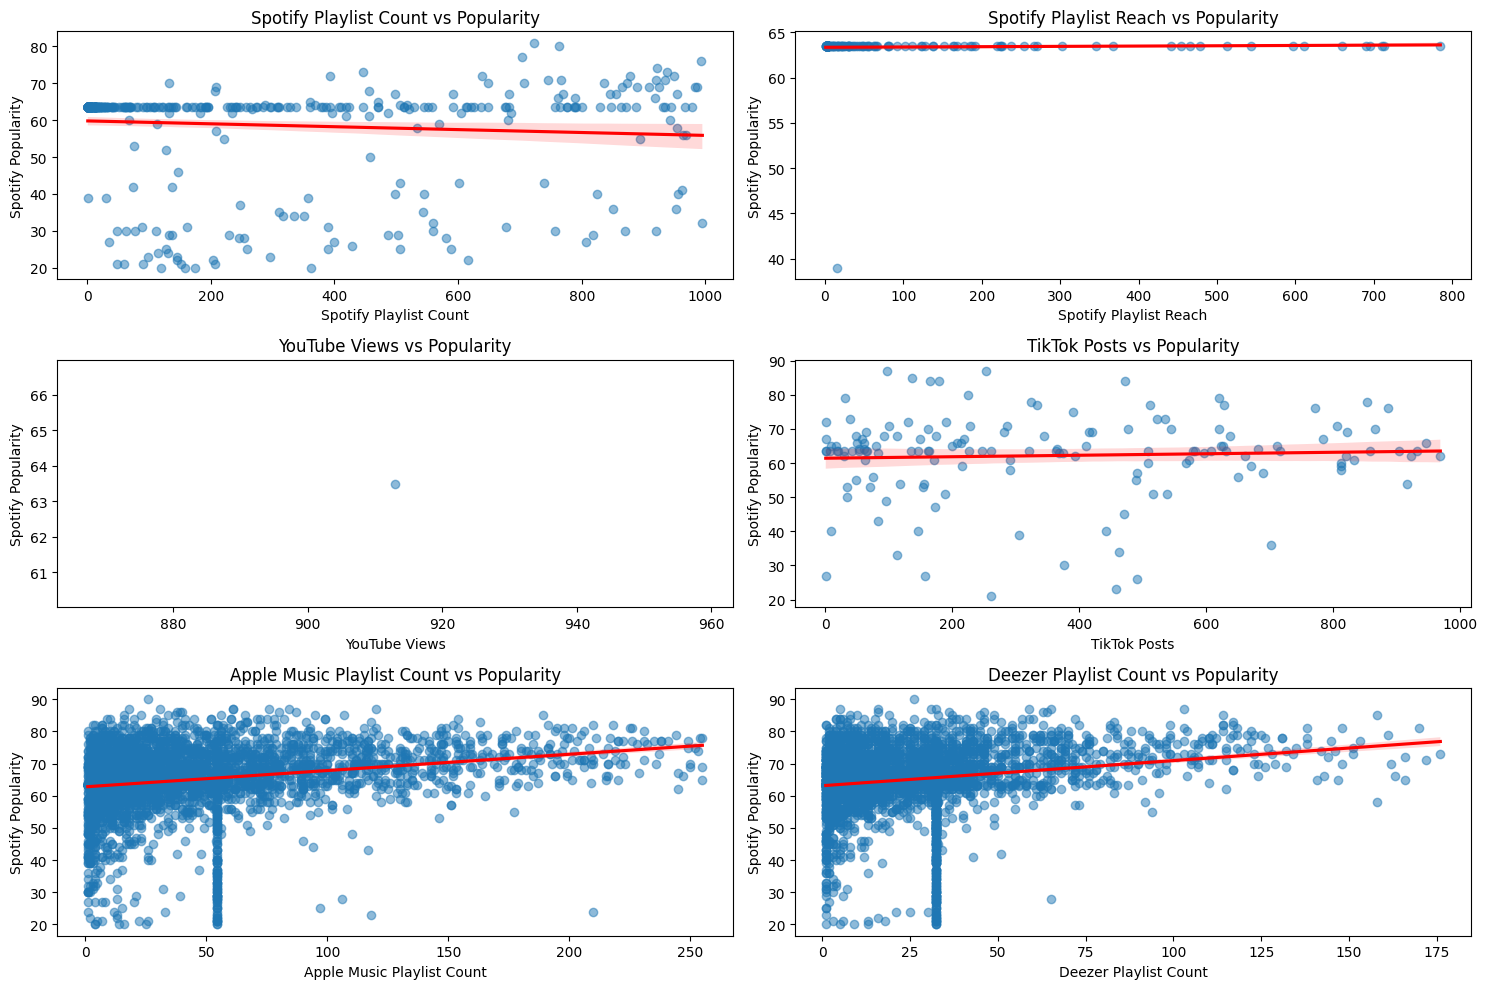

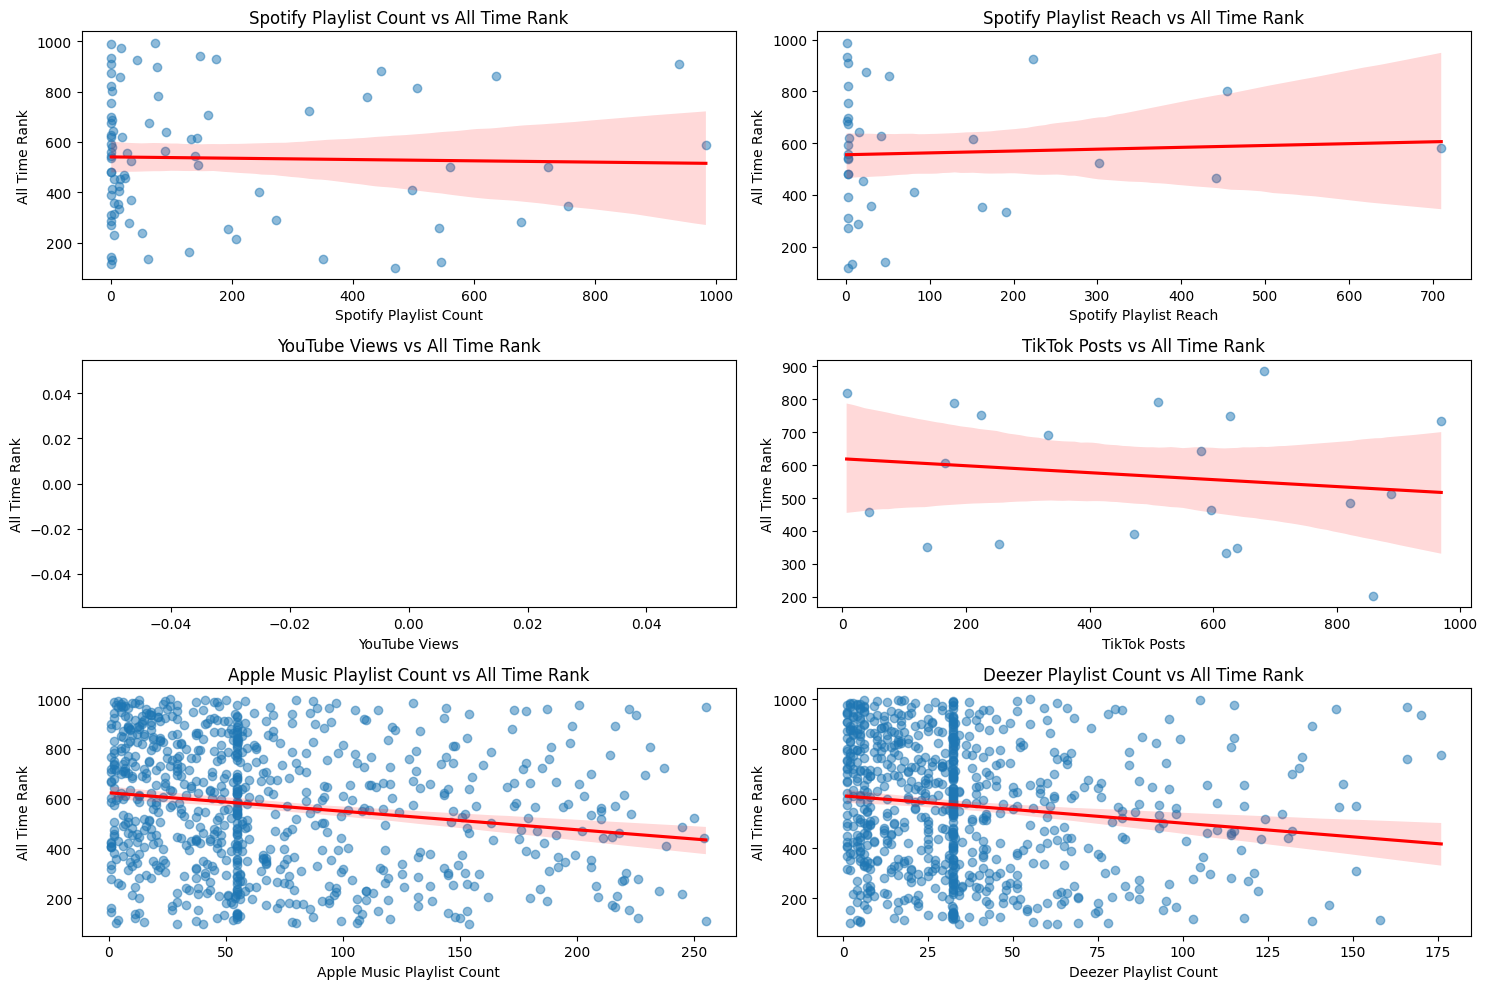

In [ ]:
sp24['Spotify Playlist Count'] = pd.to_numeric(sp24['Spotify Playlist Count'], errors='coerce')
sp24['Spotify Playlist Reach'] = pd.to_numeric(sp24['Spotify Playlist Reach'], errors='coerce')
sp24['YouTube Views'] = pd.to_numeric(sp24['YouTube Views'], errors='coerce')
sp24['TikTok Posts'] = pd.to_numeric(sp24['TikTok Posts'], errors='coerce')
sp24['Apple Music Playlist Count'] = pd.to_numeric(sp24['Apple Music Playlist Count'], errors='coerce')
sp24['Deezer Playlist Count'] = pd.to_numeric(sp24['Deezer Playlist Count'], errors='coerce')
sp24['All Time Rank'] = pd.to_numeric(sp24['All Time Rank'], errors='coerce')
sp24['Spotify Popularity'] = pd.to_numeric(sp24['Spotify Popularity'], errors='coerce')

plt.figure(figsize=(15, 10))

# Spotify Playlist Count vs Popularity
plt.subplot(3, 2, 1)
sns.regplot(x='Spotify Playlist Count', y='Spotify Popularity', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Spotify Playlist Count vs Popularity')

# Spotify Playlist Reach vs Popularity
plt.subplot(3, 2, 2)
sns.regplot(x='Spotify Playlist Reach', y='Spotify Popularity', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Spotify Playlist Reach vs Popularity')

# YouTube Views vs Popularity
plt.subplot(3, 2, 3)
sns.regplot(x='YouTube Views', y='Spotify Popularity', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('YouTube Views vs Popularity')

# TikTok Posts vs Popularity
plt.subplot(3, 2, 4)
sns.regplot(x='TikTok Posts', y='Spotify Popularity', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('TikTok Posts vs Popularity')

# Apple Music Playlist Count vs Popularity
plt.subplot(3, 2, 5)
sns.regplot(x='Apple Music Playlist Count', y='Spotify Popularity', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Apple Music Playlist Count vs Popularity')

# Deezer Playlist Count vs Popularity
plt.subplot(3, 2, 6)
sns.regplot(x='Deezer Playlist Count', y='Spotify Popularity', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Deezer Playlist Count vs Popularity')

plt.tight_layout()
plt.show()

# 4. Create scatter plots for each platform metric against All Time Rank
plt.figure(figsize=(15, 10))

# Spotify Playlist Count vs All Time Rank
plt.subplot(3, 2, 1)
sns.regplot(x='Spotify Playlist Count', y='All Time Rank', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Spotify Playlist Count vs All Time Rank')

# Spotify Playlist Reach vs All Time Rank
plt.subplot(3, 2, 2)
sns.regplot(x='Spotify Playlist Reach', y='All Time Rank', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Spotify Playlist Reach vs All Time Rank')

# YouTube Views vs All Time Rank
plt.subplot(3, 2, 3)
sns.regplot(x='YouTube Views', y='All Time Rank', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('YouTube Views vs All Time Rank')

# TikTok Posts vs All Time Rank
plt.subplot(3, 2, 4)
sns.regplot(x='TikTok Posts', y='All Time Rank', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('TikTok Posts vs All Time Rank')

# Apple Music Playlist Count vs All Time Rank
plt.subplot(3, 2, 5)
sns.regplot(x='Apple Music Playlist Count', y='All Time Rank', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Apple Music Playlist Count vs All Time Rank')

# Deezer Playlist Count vs All Time Rank
plt.subplot(3, 2, 6)
sns.regplot(x='Deezer Playlist Count', y='All Time Rank', data=sp24, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Deezer Playlist Count vs All Time Rank')

plt.tight_layout()
plt.show()


Youtube vs tiktok อันไหน popular กว่า?

ควรโฟกัสโปรโมต platform ไหนมั้ย youtube วิว vs tiktok วิว กับ spotify popularity

sp23->sp24 top 100

Songs from sp23 that made it to Top 100 in sp24:
                 track_name     artist(s)_name  bpm key   mode  \
0                Like Crazy              Jimin  120   G  Major   
1           Sweater Weather  The Neighbourhood  124  A#  Major   
2                    Snooze                SZA  143   F  Major   
3                     Lover       Taylor Swift  206   G  Major   
4               Mockingbird             Eminem   84   E  Minor   
5                Dandelions            Ruth B.  117  C#  Major   
6            No Role Modelz            J. Cole  100  A#  Minor   
7                  Nonsense  Sabrina Carpenter  139  G#  Major   
8         Romantic Homicide               d4vd  132  F#  Major   
9                  Believer    Imagine Dragons  125  A#  Minor   
10               Without Me             Eminem  112   G  Major   
11               Sure Thing             Miguel   81   B  Minor   
12            Night Changes      One Direction  120  G#  Major   
13             Pink + White

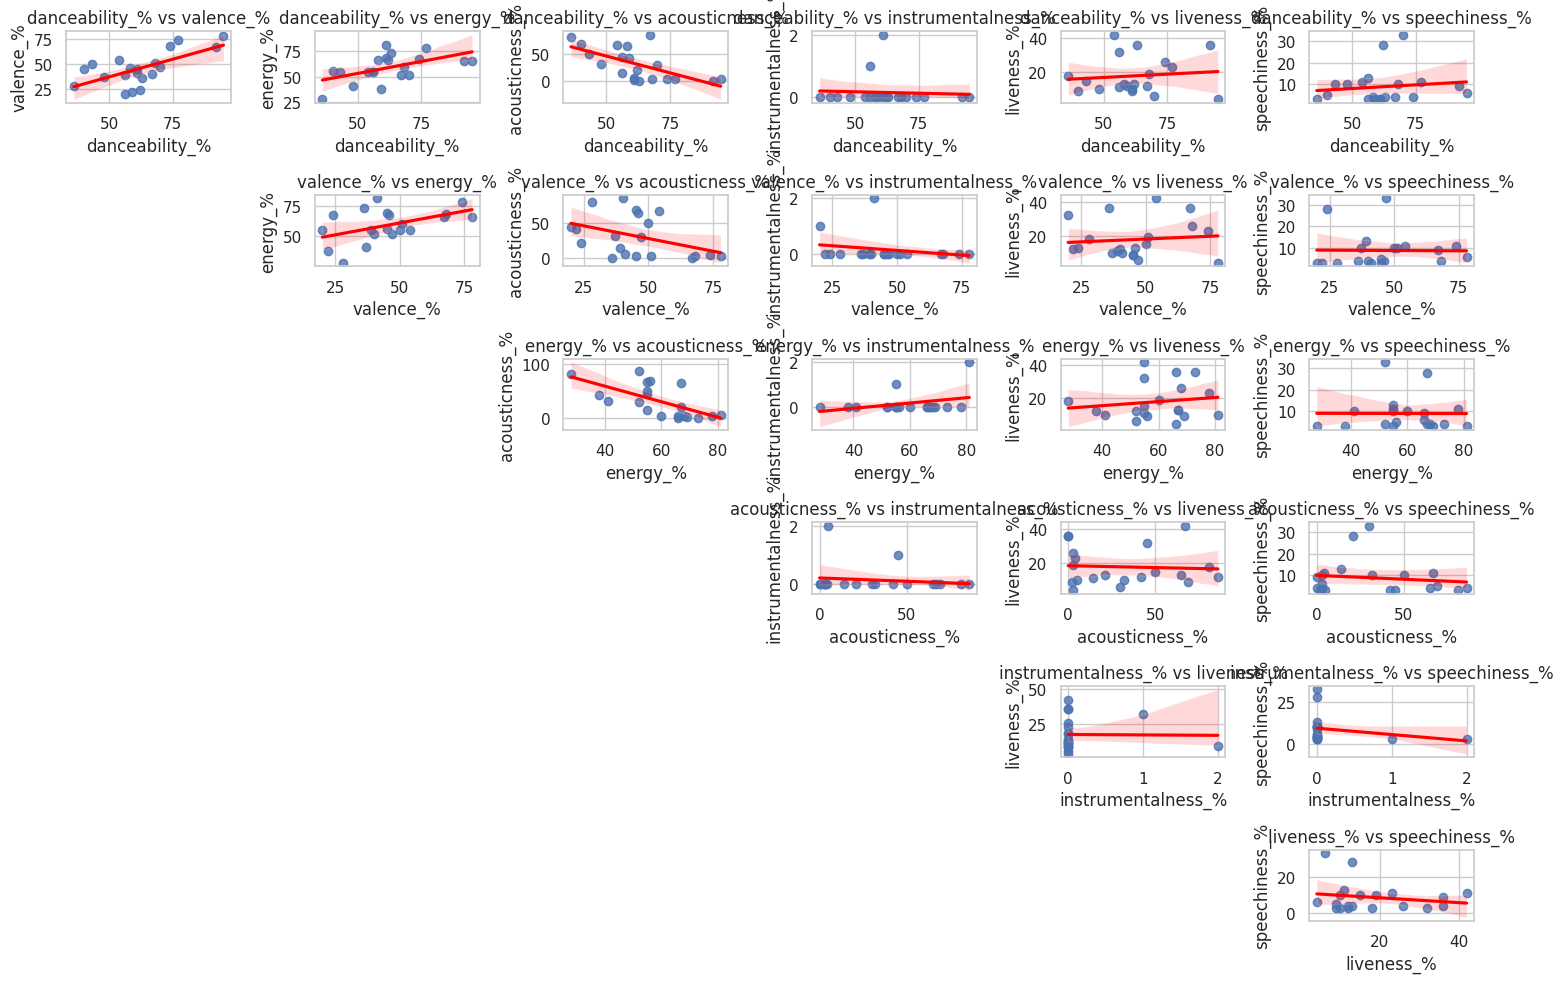

In [ ]:
sp24['Spotify Popularity'] = pd.to_numeric(sp24['Spotify Popularity'], errors='coerce')

top_100_sp24 = sp24.nlargest(100, 'Spotify Popularity')

merged_data = sp23.merge(top_100_sp24, left_on=['track_name', 'artist(s)_name'], right_on=['Track', 'Artist'], how='inner')

columns_of_interest = [
    'track_name', 'artist(s)_name', 'bpm', 'key', 'mode',
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%',
    'liveness_%', 'speechiness_%'
]
result_data = merged_data[columns_of_interest]

print("Songs from sp23 that made it to Top 100 in sp24:")
print(result_data)

summary_stats = result_data.describe()
print("\nSummary Statistics:")
print(summary_stats)

sns.set(style="whitegrid")

features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

plt.figure(figsize=(15, 10))
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.subplot(len(features)-1, len(features)-1, i * (len(features)-1) + j)
        sns.regplot(x=result_data[features[i]], y=result_data[features[j]], marker='o', line_kws={'color':'red'})
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'{features[i]} vs {features[j]}')

plt.tight_layout()
plt.show()


# อาจใช้ได้



---
    ความแตกต่างระหว่างปี: ใช้การวิเคราะห์เชิงสถิติเพื่อเปรียบเทียบแนวโน้มการฟังเพลงระหว่างปี 2023 และ 2024 เช่น การทดสอบสมมติฐานเพื่อดูว่าค่ากลางของจำนวนการสตรีมของเพลงแต่ละปีต่างกันอย่างมีนัยสำคัญหรือไม่
        T-test หรือ ANOVA: ใช้เพื่อวัดความแตกต่างของค่ากลางระหว่างสองปี

    การเปลี่ยนแปลงของศิลปินหรือแนวเพลง: วิเคราะห์ความนิยมของศิลปินหรือแนวเพลงระหว่างปี โดยใช้การวิเคราะห์การแจกแจงความถี่หรือสัดส่วนการสตรีมของเพลงในแต่ละประเภท
        Chi-square test: ทดสอบความแตกต่างในการจัดประเภทของศิลปินหรือแนวเพลงระหว่างปี

    การกระจายของการสตรีม: ใช้การทดสอบสมมติฐานเพื่อเปรียบเทียบการกระจายตัวของจำนวนการสตรีมในแต่ละปี เช่น การใช้การทดสอบ Kolmogorov-Smirnov หรือ Mann-Whitney U

การทำนาย:

    การทำนายแนวโน้มเพลงยอดนิยมในอนาคต: ข้อมูลจากทั้งสองปีสามารถนำมาใช้ในการสร้างโมเดล Machine Learning เช่น Time Series Forecasting เพื่อทำนายเพลงยอดนิยมในปีถัดไป หรือแนวโน้มความนิยมในแนวเพลง
        ARIMA หรือ Prophet: ใช้สำหรับการทำนายความนิยมในอนาคตของเพลงหรือศิลปิน

    การคาดการณ์ศิลปินใหม่ที่จะโดดเด่น: โดยใช้โมเดลการจำแนก (classification) เช่น Random Forest หรือ Logistic Regression เพื่อคาดการณ์ว่าศิลปินหรือเพลงใดมีแนวโน้มจะประสบความสำเร็จสูงขึ้นในปี 2025

    การทำนายการเติบโตของการสตรีม: สร้างโมเดล Regression เพื่อคาดการณ์จำนวนการสตรีมของเพลงในอนาคต โดยอิงจากแนวโน้มของปีที่ผ่านมา

    การแนะนำเพลง (Recommendation Systems): ใช้ข้อมูลเพื่อนำไปพัฒนาอัลกอริทึมสำหรับการแนะนำเพลงตามพฤติกรรมการฟังเพลงของผู้ใช้ โดยใช้ Collaborative Filtering หรือ Content-Based Filtering
